<a href="https://colab.research.google.com/github/fahmihamzah84/TugasBesarMalin/blob/master/1301174043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/fahmihamzah84/TugasBesarMalin/master/Downloads/used_cars.csv'
used_cars = pd.read_csv(url)
#read datasheet into pandas dataframe

used_cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


Memilih Kolom

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
u_c = used_cars.drop([
	"Unnamed: 0",
  "id",
  "price",
  "cylinders",
	"url",
	"region_url",
	"title_status",
	"vin",
	"drive",
	"size",
  "manufacturer",
  "model",
	"paint_color",
	"image_url",
	"description",
	"county",
	"state",
	"region",
	"condition",
	"fuel",
	"year",
	"lat",
	"long"
], axis = 1)

(u_c)

,odometer,transmission,type
0,63500.0,manual,hatchback
1,10.0,automatic,NaN
2,7554.0,automatic,NaN
3,10.0,automatic,NaN
4,70150.0,automatic,pickup
...,...,...,...
19996,43406.0,automatic,truck
19997,32867.0,automatic,sedan
19998,17514.0,automatic,SUV
19999,30486.0,automatic,sedan


In [4]:
u_c.isnull().sum()

odometer        2389
transmission     190
type            3659
dtype: int64

In [0]:
u_c.dropna(inplace=True)
#Drop NaN
u_c.reset_index(drop=True, inplace=True)
#reset index

Object to Numbers

In [0]:
u_c['transmission'] = u_c['transmission'].replace({
    'manual': 1, 
    'automatic': 2, 
    'other': 3, 
    })

u_c['type'] = u_c['type'].replace({
    'hatchback': 1, 
    'pickup': 2, 
    'SUV': 3, 
    'sedan': 4, 
    'truck': 5, 
    'wagon':6,
    'van':7,
    'coupe':8,
    'convertible':9,
    'other':10,
    'offroad':11,
    'mini-van':12,
    'bus':13
    })

Rubah tipe data

In [7]:
u_c['odometer'] = u_c['odometer'].astype(np.int64)
u_c['transmission'] = u_c['transmission'].astype(np.int64)
u_c['type'] = u_c['type'].astype(np.int64)

u_c.dtypes

odometer        int64
transmission    int64
type            int64
dtype: object

In [8]:
print (u_c)

       odometer  transmission  type
0         63500             1     1
1         70150             2     2
2        120057             2     2
3         95484             2     2
4         89340             2     2
...         ...           ...   ...
15206     43406             2     5
15207     32867             2     4
15208     17514             2     3
15209     30486             2     4
15210     22078             2     3

[15211 rows x 3 columns]


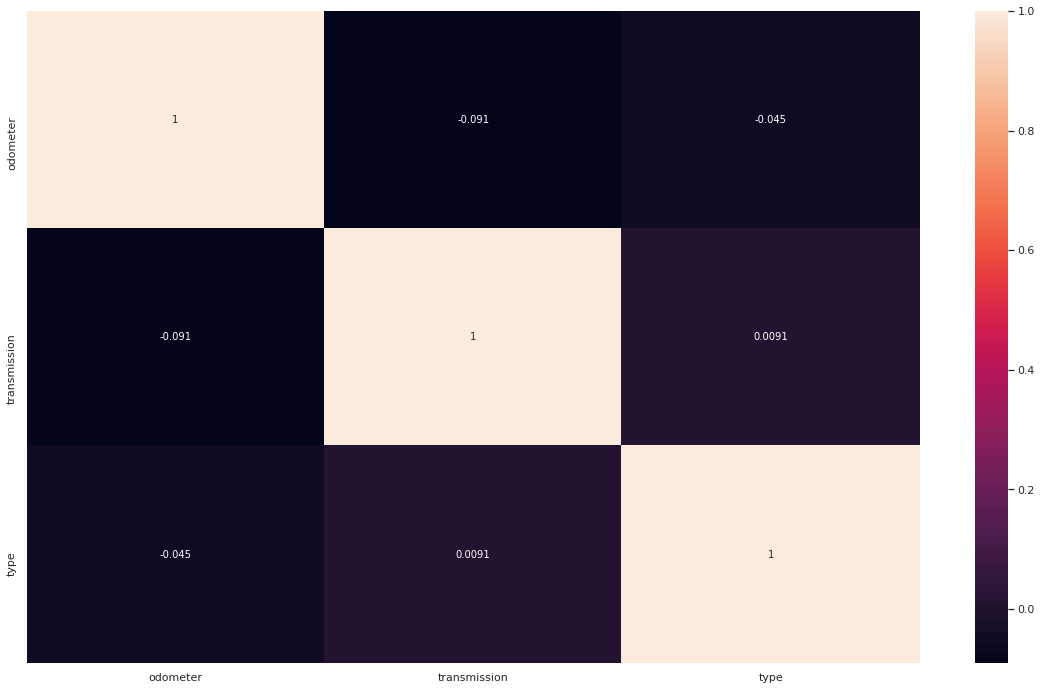

In [9]:
import seaborn as sns
# ax = sns.heatmap(u_c.isna())
plt.figure(figsize=(20,12)) 
sns.heatmap(u_c.corr(), annot=True)

In [0]:
X = u_c.drop(['odometer'], axis = 1)
y = u_c['odometer']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (12168, 2)
The size of our testing "X" (input features) is (3043, 2)
The size of our training "y" (output feature) is (12168,)
The size of our testing "y" (output features) is (3043,)


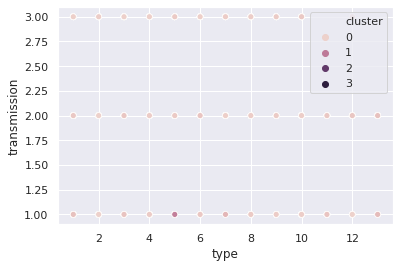

In [12]:
df_clustering = pd.DataFrame(X_train, columns=['transmission', 'type'])
df_clustering['cluster'] = y_train
df_clustering
sns.scatterplot(x='type', y='transmission', hue='cluster', data=df_clustering)

In [0]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
y_predict